**Analysis** 
add analysis here

Three observations that can be made from the data:
1) The drug treatment Capomulin indicates that it is more effective at treating tumors than the other three drug regimines. This is demonstrated with the box plot visualization showing the distribution of tumor volumes.
2) As depicted in the linear regression, tumor size increases with the mouse weight. We also see that visualzation in the scatter plot that as the mouse weight increases so do observations of tumor size.
3) There is high variability in the tumor sizes in the data set. We can infer this from the IQR which is 15.57

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from pathlib import Path
import numpy as np

# Study data files
mouse_metadata_path = ("C:/Users/miesb/OneDrive/Desktop/module_5_challenge/Starter_Code/Pymaceuticals/data/Mouse_metadata.csv")
study_results_path = ("C:/Users/miesb/OneDrive/Desktop/module_5_challenge/Starter_Code/Pymaceuticals/data/Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.shape

(1893, 8)

In [2]:
# Checking the number of mice.
distinct_mice = combined_data['Mouse ID'].nunique()
print(distinct_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouseid_time = combined_data.drop_duplicates(['Mouse ID', 'Timepoint'], keep=False)
#print(mouseid_time)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'], keep=False)]
print(duplicate_mice)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

In [4]:
# Optional: Get all the data for the duplicate mouse ID
duplicate_mice



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_duplicate_mice = combined_data.loc[combined_data['Mouse ID'] != 'g989']
drop_duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
drop_duplicate_mice['Mouse ID'].value_counts().count()

248

##**Summary Statistics**

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

statistics_table = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median'])

statistics_table = statistics_table.rename(columns={
'mean': 'Mean Tumor Volume', 'median': 'Median Tumor Volume'})
statistics_table.head()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. (ChatGPT, personal communication, January 19, 2023)

sem_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
variance_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation_tumor = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

statistics_table['Tumor Volume Std. Error'] = sem_tumor
statistics_table['Tumor Volume Variance'] = variance_tumor
statistics_table['Tumor Volumen Std. Dev'] = std_deviation_tumor




# Assemble the resulting series into a single summary DataFrame.
summary_statistics = pd.DataFrame(statistics_table)
summary_statistics




,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Std. Error,Tumor Volume Variance,Tumor Volumen Std. Dev
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = statistics_table = drop_duplicate_mice.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
table_title = 'Tumor Volume (mm3)'
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


##**Bar and Pie Charts

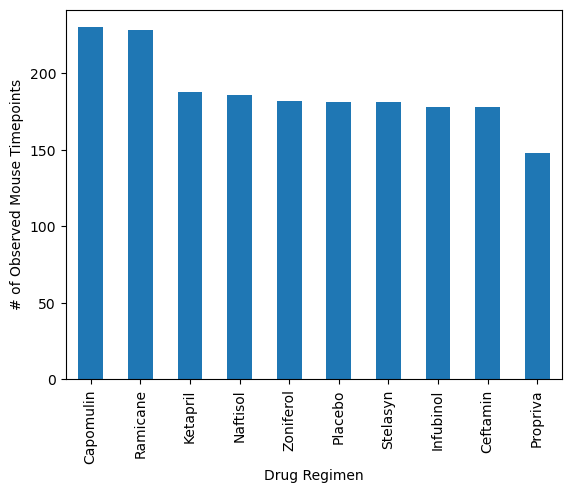

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drop_duplicate_mice_chart = drop_duplicate_mice['Drug Regimen'].value_counts()
drop_duplicate_mice_chart.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


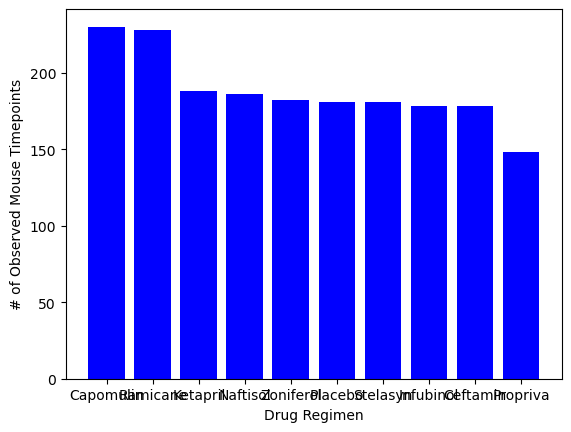

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs_chart = drop_duplicate_mice['Drug Regimen'].value_counts()

plt.bar(drugs_chart.index, drugs_chart, color='b', align="center")
        

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()


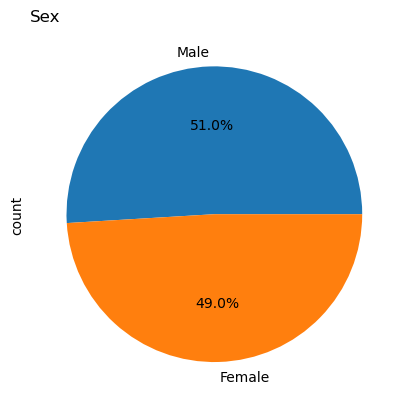

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
drop_duplicate_mice_chart = drop_duplicate_mice['Sex'].value_counts()
drop_duplicate_mice_chart.plot(kind='pie', autopct='%1.1f%%', labels=["Male", "Female"])
plt.title("Sex", loc="left")
plt.show()


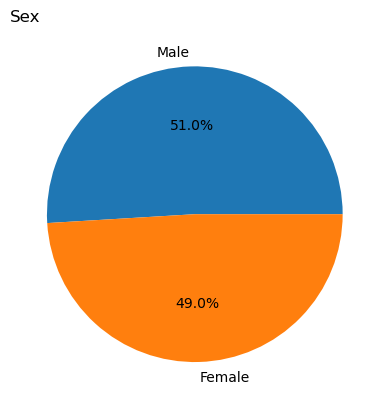

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
drop_duplicate_mice_chart = drop_duplicate_mice['Sex'].value_counts()

plt.pie(drop_duplicate_mice_chart, labels=["Male", "Female"], autopct='%1.1f%%')
plt.title("Sex", loc="left")
plt.show()

##**Quartiles, Outliers and Boxplots**

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  (ChatGPT, personal communication, January 23, 2024)
# Start by getting the last (greatest) timepoint for each mouse (ChatGPT, personal communication, January 23, 2024)

current_timepoint = drop_duplicate_mice.groupby('Mouse ID')['Timepoint'].max()

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_data = pd.merge(drop_duplicate_mice, current_timepoint, on=['Mouse ID', 'Timepoint'], how='inner')
final_tumor_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,Stelasyn,Female,21,28,5,45.934712,0
244,z435,Propriva,Female,12,26,10,48.710661,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
#final_tumor_data.info()

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data =[]


#Locate the rows which contain mice on each drug and get the tumor volumes (ChatGPT, personal communication, January 23, 2024.

for treatment in treatments:
    treatment_data = final_tumor_data.loc[final_tumor_data["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']#.reset_index(drop=True)
    tumor_volume_data.append(treatment_data)
    #print(tumor_volume_data)

# Calculate the IQR and quantitatively determine if there are any potential outliers. (samples_solution in class exercise)

quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
lower_quartile = quartiles[0.25]
upper_quartile = quartiles[0.75]
iqr = upper_quartile - lower_quartile
    
    # Determine outliers using upper and lower bounds. (samples_solution in class exercise)
outliers_dict = {}

lower_bound = lower_quartile - 1.5 * iqr
upper_bound = upper_quartile + 1.5 * iqr

maybe_outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]
outliers_dict[treatment] = maybe_outliers

# Display the dictionary with potential outliers + print out upper/lower bound outliers
print(f"{treatments}'s potential outliers {maybe_outliers}")

print(f"The lower quartile is: {lower_quartile}")
print(f"The upper quartile is: {upper_quartile}")
print(f"The iqr is: {iqr}")
print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")

AttributeError: 'list' object has no attribute 'quantile'

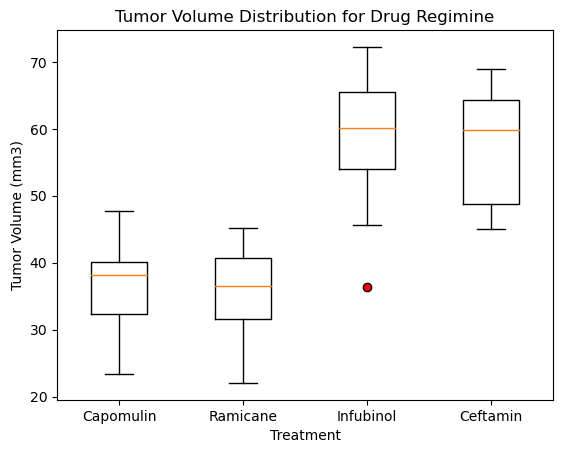

In [42]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Create a list of tumor volumes for each treatment (ChatGPT, personal communication, January 23, 2023).
#treatment_data_dict[treatment]['All Data'] for treatment in treatments]

# Generate a box plot.Boxplot Demo from 
#https://matplotlib.org/3.3.3/gallery/pyplots/boxplot_demo_pyplot.html#sphx-glr-gallery-pyplots-boxplot-demo-pyplot-py
plt.boxplot(tumor_volume_data, labels=treatments, flierprops=dict(markerfacecolor='r', marker='o'))

plt.title('Tumor Volume Distribution for Drug Regimine')
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


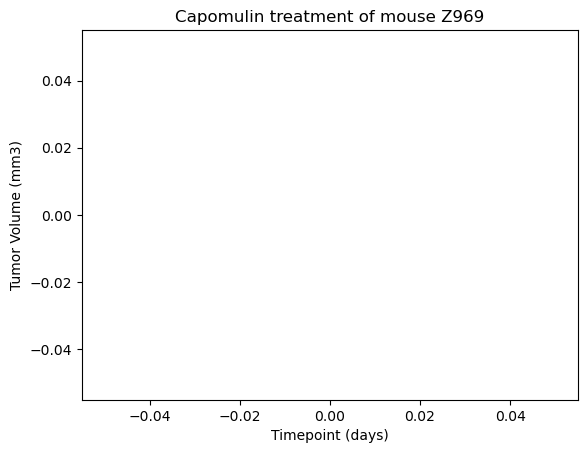

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
drug_treatment = "Capomulin"
mouse = final_tumor_data[(final_tumor_data['Drug Regimen'] == drug_treatment) & (final_tumor_data['Mouse ID'] == 'z969')]

# Create a line plot
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o')

# Show the plot

plt.title("Capomulin treatment of mouse Z969")
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

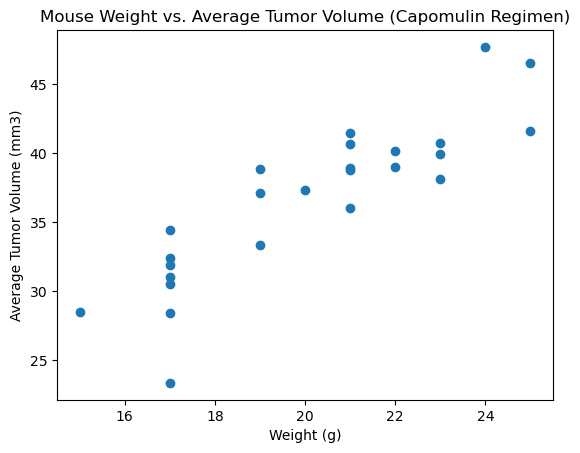

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen. 
#Code sourced (ChatGPT, personal communication, January 23, 2024)

# Choose the Capomulin regimen (ChatGPT, personal communication, January 23, 2024)
capomulin_data = final_tumor_data[final_tumor_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse. (ChatGPT, personal communication, January 23, 2024)
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the weight data. (ChatGPT, personal communication, January 23, 2024)
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Create a scatter plot. (ChatGPT, personal communication, January 23, 2024)
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Show the plot
plt.show()


##**Correlation and Regression**

Correlation Coefficient: 0.8767060403658116


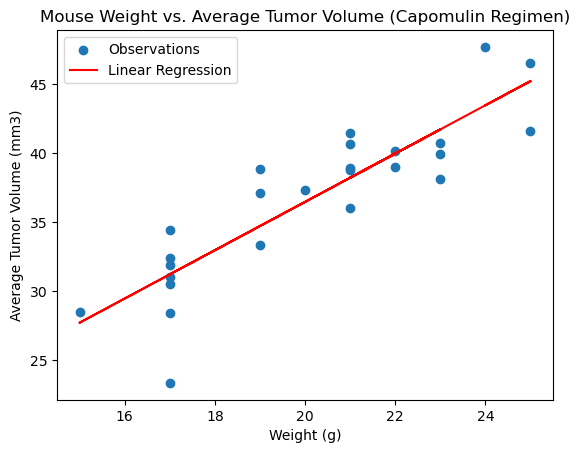

In [50]:
from sklearn.linear_model import LinearRegression

# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
#Code sourced (ChatGPT, personal communication, January 23, 2024)

# Choose the Capomulin regimen. (ChatGPT, personal communication, January 23, 2024)
capomulin_data = final_tumor_data[final_tumor_data['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse. (ChatGPT, personal communication, January 23, 2024)
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Merge the average tumor volume data with the weight data. (ChatGPT, personal communication, January 23, 2024)
merged_data = pd.merge(capomulin_data[['Mouse ID', 'Weight (g)']].drop_duplicates(), average_tumor_volume, on='Mouse ID')

# Calculate the correlation coefficient. (ChatGPT, personal communication, January 23, 2024)
correlation_coefficient, _ = st.pearsonr(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression (ChatGPT, personal communication, January 23, 2024)
X = merged_data[['Weight (g)']]
y = merged_data['Tumor Volume (mm3)']

# Create and fit the linear regression model. (ChatGPT, personal communication, January 23, 2024)
model = LinearRegression()
model.fit(X, y)

# Predict tumor volume using the linear regression model. (ChatGPT, personal communication, January 23, 2024)
predictions = model.predict(X)

# Plot the linear regression line. (ChatGPT, personal communication, January 23, 2024)
plt.scatter(X, y, label='Observations')
plt.plot(X, predictions, color='red', label='Linear Regression')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.legend()
plt.show()
